## 11.2 Segmentation Data

In [1]:
load("./segdf-Rintro-Ch5.RData")
seg.raw <- seg.df
seg.df <- seg.raw[, -7]
summary(seg.df)

      age           gender        income            kids        ownHome   
 Min.   :19.26   Female:157   Min.   : -5183   Min.   :0.00   ownNo :159  
 1st Qu.:33.01   Male  :143   1st Qu.: 39656   1st Qu.:0.00   ownYes:141  
 Median :39.49                Median : 52014   Median :1.00               
 Mean   :41.20                Mean   : 50937   Mean   :1.27               
 3rd Qu.:47.90                3rd Qu.: 61403   3rd Qu.:2.00               
 Max.   :80.49                Max.   :114278   Max.   :7.00               
  subscribe  
 subNo :260  
 subYes: 40  
             
             
             
             

# 11.3 Clustering 
## 11.3.1 The Steps of Clustering
### 11.3.1.1 A Quick Check Function

In [2]:
seg.summ <- function(data, groups){
    aggregate(data, list(groups), function(x) mean(as.numeric(x)))
}
seg.summ(seg.df, seg.raw$Segment)

Group.1,age,gender,income,kids,ownHome,subscribe
Moving Up,36.33114,1.30,53090.97,1.914286,1.328571,1.200
Suburb mix,39.92815,1.52,55033.82,1.920000,1.480000,1.060
Travelers,57.87088,1.50,62213.94,0.000000,1.750000,1.125
Urban hip,23.88459,1.60,21681.93,1.100000,1.200000,1.200


### 11.3.1.2 Hierarchical Clustering: hclust() Basics

In [3]:
d <- dist(seg.df[, c("age", "income", "kids")])
as.matrix(d)[1:5,1:5]

,1,2,3,4,5
1,0.000,13936.531,5313.626,31559.178,29870.205
2,13936.531,0.000,8622.906,45495.698,43806.727
3,5313.626,8622.906,0.000,36872.800,35183.828
4,31559.178,45495.698,36872.800,0.000,1688.977
5,29870.205,43806.727,35183.828,1688.977,0.000


In [4]:
library(cluster)
seg.dist <- daisy(seg.df)
as.matrix(seg.dist)[1:5,1:5]

,1,2,3,4,5
1,0.0000000,0.2532815,0.2329028,0.2617250,0.4161338
2,0.2532815,0.0000000,0.0679978,0.4129493,0.3014468
3,0.2329028,0.0679978,0.0000000,0.4246012,0.2932957
4,0.2617250,0.4129493,0.4246012,0.0000000,0.2265436
5,0.4161338,0.3014468,0.2932957,0.2265436,0.0000000


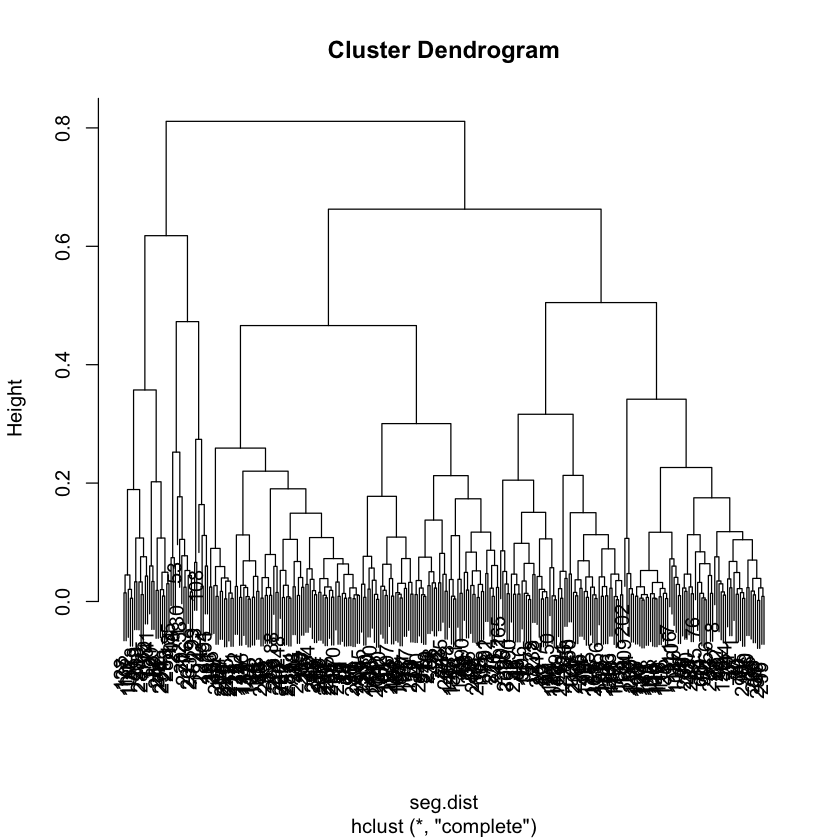

In [5]:
seg.hc <- hclust(seg.dist, method="complete")
plot(seg.hc)

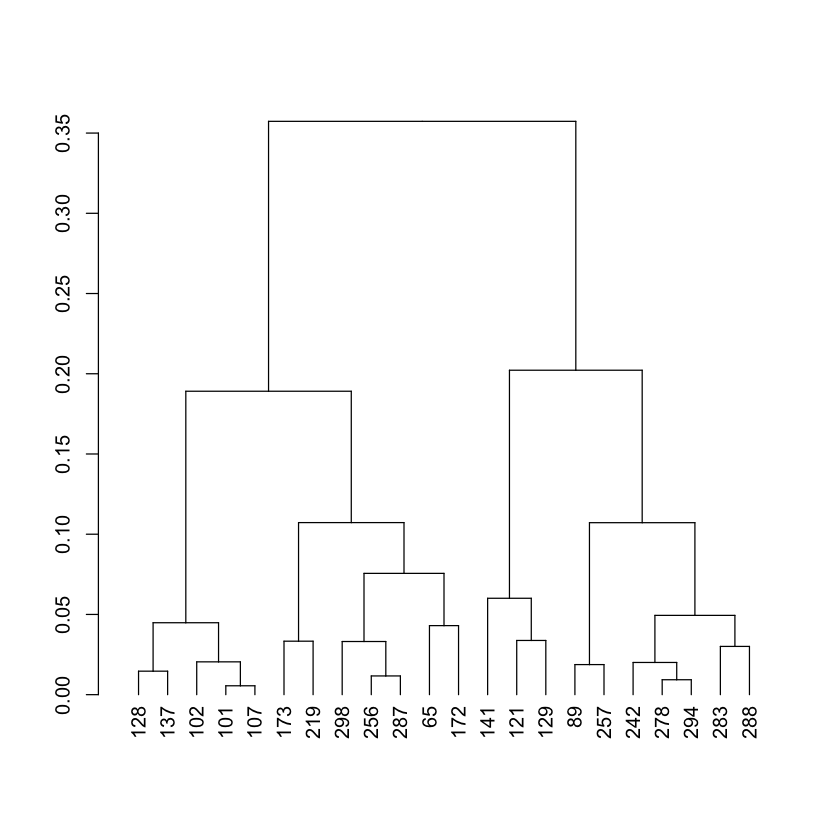

In [6]:
plot(cut(as.dendrogram(seg.hc), h=0.5)$lower[[1]])

In [7]:
seg.df[c(101,107), ]
seg.df[c(278,294), ]
seg.df[c(173,141), ]

,age,gender,income,kids,ownHome,subscribe
101,24.73796,Male,18457.85,1,ownNo,subYes
107,23.19013,Male,17510.28,1,ownNo,subYes


,age,gender,income,kids,ownHome,subscribe
278,36.23860,Female,46540.88,1,ownNo,subYes
294,35.79961,Female,52352.69,1,ownNo,subYes


,age,gender,income,kids,ownHome,subscribe
173,64.70641,Male,45517.15,0,ownNo,subYes
141,25.17703,Female,20125.80,2,ownNo,subYes


In [8]:
cor(cophenetic(seg.hc), seg.dist)

[1] 0.7682436

## 11.3.3 Hierarchical Clustering Continued: Groups fro hclust()

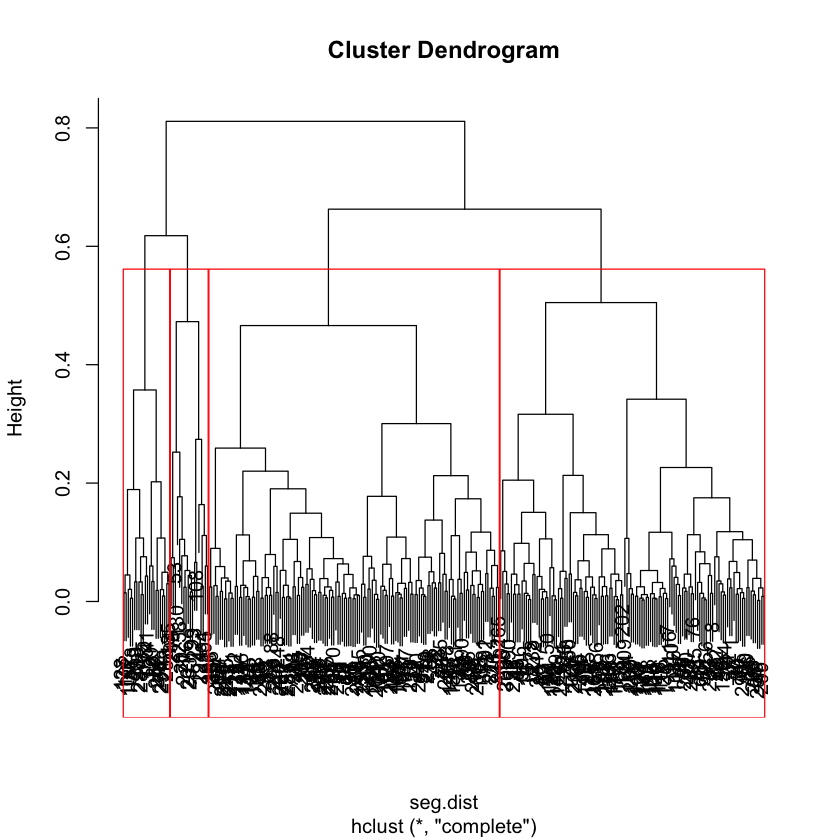

In [9]:
plot(seg.hc)
rect.hclust(seg.hc, k=4, border="red")

In [10]:
seg.hc.segment <- cutree(seg.hc, k=4)
table(seg.hc.segment)

seg.hc.segment
  1   2   3   4 
124 136  18  22 

In [11]:
seg.summ(seg.df, seg.hc.segment)

Group.1,age,gender,income,kids,ownHome,subscribe
1,40.78456,2.000000,49454.08,1.314516,1.467742,1
2,42.03492,1.000000,53759.62,1.235294,1.477941,1
3,44.31194,1.388889,52628.42,1.388889,2.000000,2
4,35.82935,1.545455,40456.14,1.136364,1.000000,2


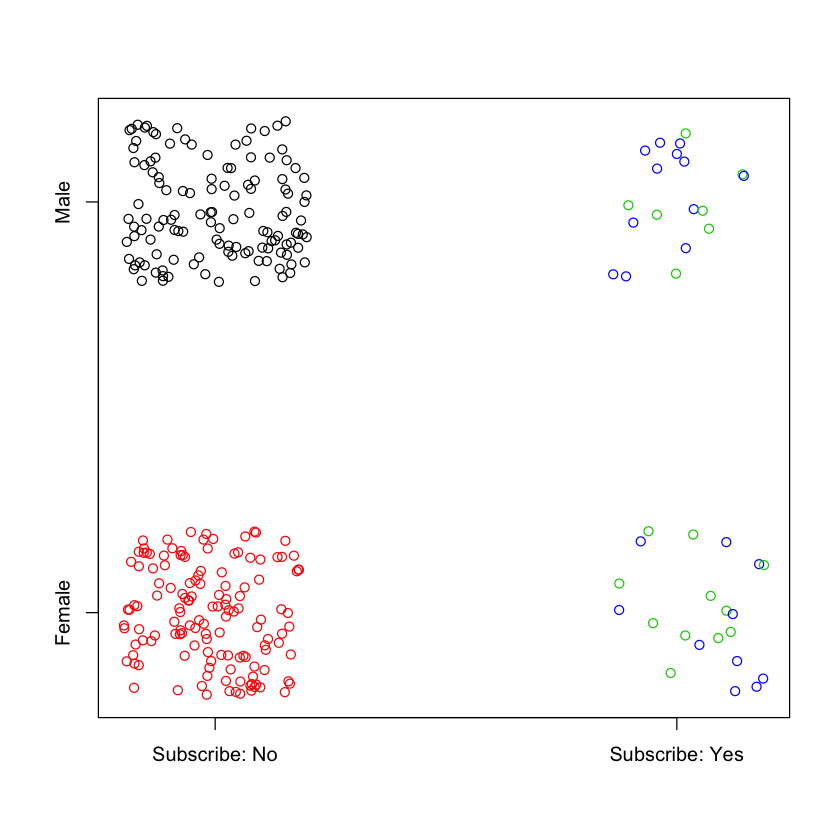

In [12]:
plot(jitter(as.numeric(seg.df$gender)) ~
        jitter(as.numeric(seg.df$subscribe)),
        col=seg.hc.segment, yaxt="n", xaxt="n", ylab="", xlab="")
axis(1, at=c(1,2), labels=c("Subscribe: No", "Subscribe: Yes"))
axis(2, at=c(1,2), labels=levels(seg.df$gender))

## 11.3.4 Mean-Based Clustering: kmeans()

In [13]:
seg.df.num <- seg.df
seg.df.num$gender <- ifelse(seg.df$gender=="Male", 0, 1)
seg.df.num$ownHome <- ifelse(seg.df$ownHome=="ownNo", 0, 1)
seg.df.num$subscribe <- ifelse(seg.df$subscribe=="subNo", 0, 1)
summary(seg.df.num)

      age            gender           income            kids     
 Min.   :19.26   Min.   :0.0000   Min.   : -5183   Min.   :0.00  
 1st Qu.:33.01   1st Qu.:0.0000   1st Qu.: 39656   1st Qu.:0.00  
 Median :39.49   Median :1.0000   Median : 52014   Median :1.00  
 Mean   :41.20   Mean   :0.5233   Mean   : 50937   Mean   :1.27  
 3rd Qu.:47.90   3rd Qu.:1.0000   3rd Qu.: 61403   3rd Qu.:2.00  
 Max.   :80.49   Max.   :1.0000   Max.   :114278   Max.   :7.00  
    ownHome       subscribe     
 Min.   :0.00   Min.   :0.0000  
 1st Qu.:0.00   1st Qu.:0.0000  
 Median :0.00   Median :0.0000  
 Mean   :0.47   Mean   :0.1333  
 3rd Qu.:1.00   3rd Qu.:0.0000  
 Max.   :1.00   Max.   :1.0000  

In [14]:
set.seed(96743)
seg.k <- kmeans(seg.df.num, centers=4)
seg.summ(seg.df, seg.k$cluster)

Group.1,age,gender,income,kids,ownHome,subscribe
1,56.37245,1.428571,92287.07,0.4285714,1.857143,1.142857
2,29.58704,1.571429,21631.79,1.0634921,1.301587,1.158730
3,44.42051,1.452632,64703.76,1.2947368,1.421053,1.073684
4,42.08381,1.454545,48208.86,1.5041322,1.528926,1.165289


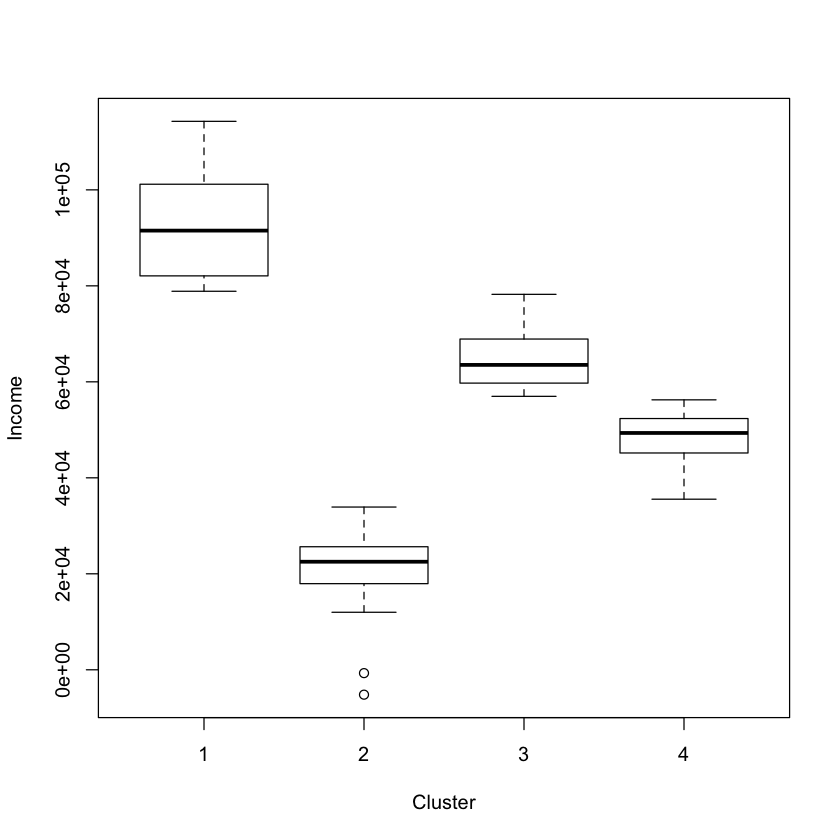

In [15]:
boxplot(seg.df.num$income ~ seg.k$cluster, ylab="Income", xlab="Cluster")

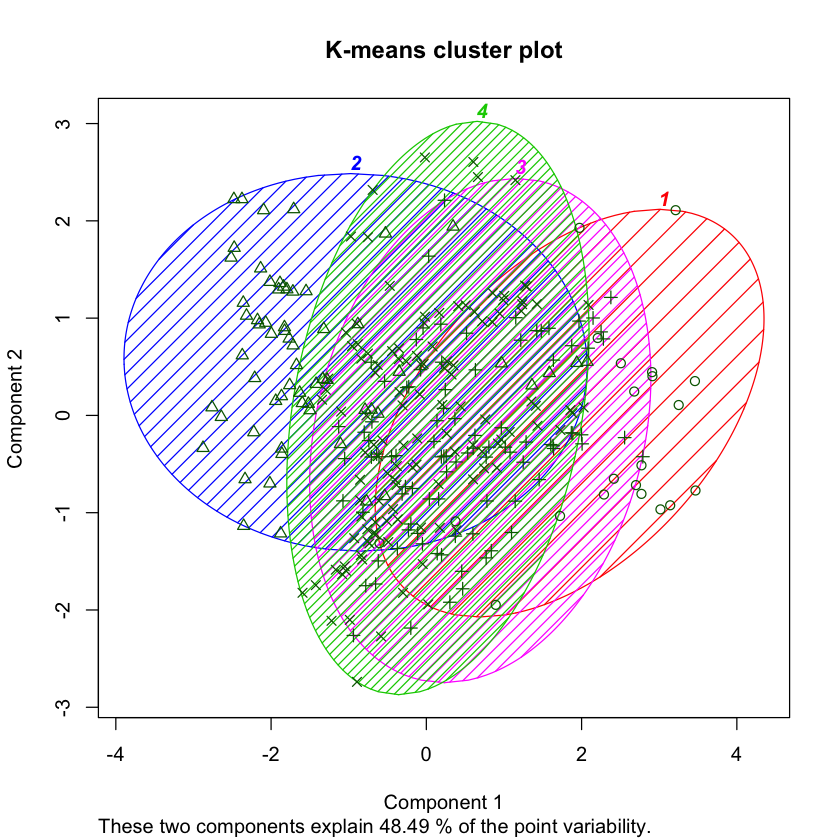

In [16]:
library(cluster)
clusplot(seg.df, seg.k$cluster, color=TRUE, shade=TRUE, label=4, lines=0, main="K-means cluster plot")

## 11.3.5 Model-Based Clustering: Mclust()

In [25]:
library(mclust)
seg.mc <- Mclust(seg.df.num)
summary(seg.mc)

----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust VEV (ellipsoidal, equal shape) model with 3 components:

 log.likelihood   n df       BIC       ICL
      -5137.106 300 73 -10690.59 -10690.59

Clustering table:
  1   2   3 
163  71  66 

In [26]:
seg.mc4 <- Mclust(seg.df.num, G=4)
summary(seg.mc4)

----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust VII (spherical, varying volume) model with 4 components:

 log.likelihood   n df       BIC       ICL
      -16862.69 300 31 -33902.19 -33906.18

Clustering table:
  1   2   3   4 
104  66  59  71 

## 11.3.6 Comparing Models with BIC()

In [27]:
BIC(seg.mc, seg.mc4)

,df,BIC
seg.mc,73,10690.59
seg.mc4,31,33902.11


In [28]:
seg.summ(seg.df, seg.mc$class)

Group.1,age,gender,income,kids,ownHome,subscribe
1,44.68018,1.472393,52980.52,1.171779,1.865031,1.245399
2,38.02229,1.000000,51550.98,1.422535,1.000000,1.000000
3,36.02187,2.000000,45227.51,1.348485,1.000000,1.000000


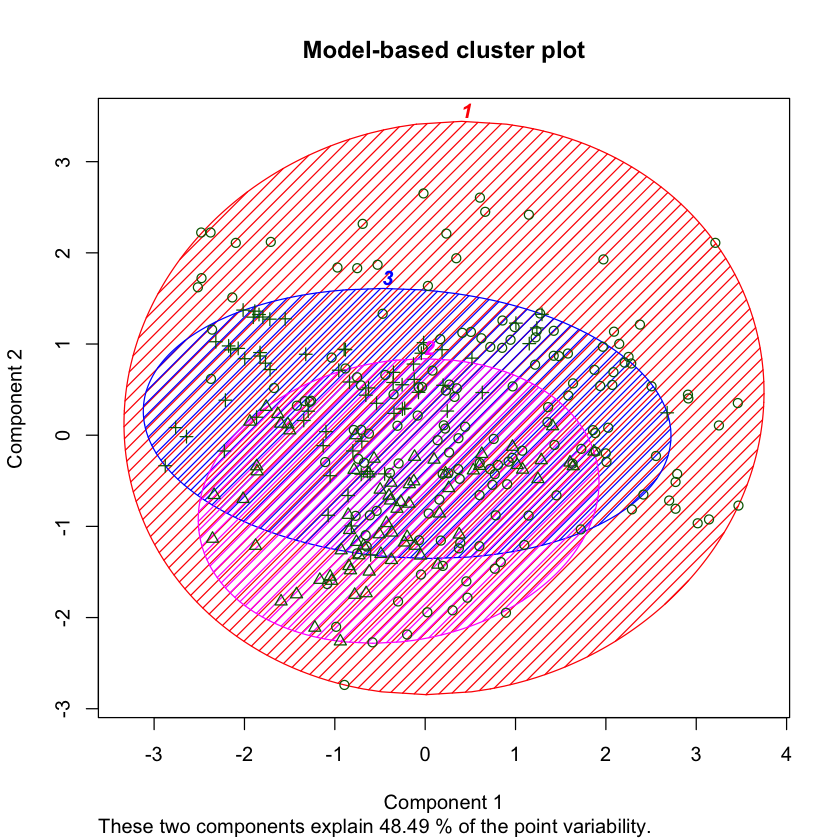

In [29]:
library(cluster)
clusplot(seg.df, seg.mc$class, color=TRUE, shade=TRUE, labels=4, lines=0, main="Model-based cluster plot")

## 11.3.7 Latent Class Anaysis: poLCA()

In [30]:
seg.df.cut <- seg.df
seg.df.cut$age <- factor(ifelse(seg.df$age < median(seg.df$age), 1, 2))
seg.df.cut$income <- factor(ifelse(seg.df$income < median(seg.df$income), 1, 2))
seg.df.cut$kids <- factor(ifelse(seg.df$kids < median(seg.df$kids), 1, 2))
summary(seg.df.cut)

 age        gender    income  kids      ownHome     subscribe  
 1:150   Female:157   1:150   1:121   ownNo :159   subNo :260  
 2:150   Male  :143   2:150   2:179   ownYes:141   subYes: 40  

In [31]:
seg.f <- with(seg.df.cut, cbind(age, gender, income, kids, ownHome, subscribe)~1)

library(poLCA)
set.seed(02807)
seg.LCA3 <- poLCA(seg.f, data=seg.df.cut, nclass=3)
seg.LCA4 <- poLCA(seg.f, data=seg.df.cut, nclass=4)

Loading required package: scatterplot3d
Loading required package: MASS


Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$age
               1      2
class 1:  1.0000 0.0000
class 2:  0.0000 1.0000
class 3:  0.6555 0.3445

$gender
          Female   Male
class 1:  0.4211 0.5789
class 2:  0.4681 0.5319
class 3:  0.6079 0.3921

$income
               1      2
class 1:  1.0000 0.0000
class 2:  0.3803 0.6197
class 3:  0.3746 0.6254

$kids
               1      2
class 1:  0.2818 0.7182
class 2:  0.8065 0.1935
class 3:  0.1575 0.8425

$ownHome
           ownNo ownYes
class 1:  0.7289 0.2711
class 2:  0.2338 0.7662
class 3:  0.6638 0.3362

$subscribe
           subNo subYes
class 1:  0.7496 0.2504
class 2:  0.8948 0.1052
class 3:  0.8960 0.1040

Estimated class population shares 
 0.1974 0.341 0.4616 
 
Predicted class memberships (by modal posterior prob.) 
 0.2333 0.3467 0.42 
 
Fit for 3 latent classes: 
number of observations: 300 
number of estimated parameters: 20 
residual degrees of freedom: 43 
maximum log-

In [32]:
seg.LCA4$bic
seg.LCA3$bic

[1] 2330.043

[1] 2298.767

Group.1,age,gender,income,kids,ownHome,subscribe
1,28.22385,1.685714,30075.32,1.1285714,1.285714,1.271429
2,54.44407,1.576923,60082.47,0.3846154,1.769231,1.105769
3,37.47652,1.277778,54977.08,2.0793651,1.325397,1.079365



  1   2   3 
 70 104 126 

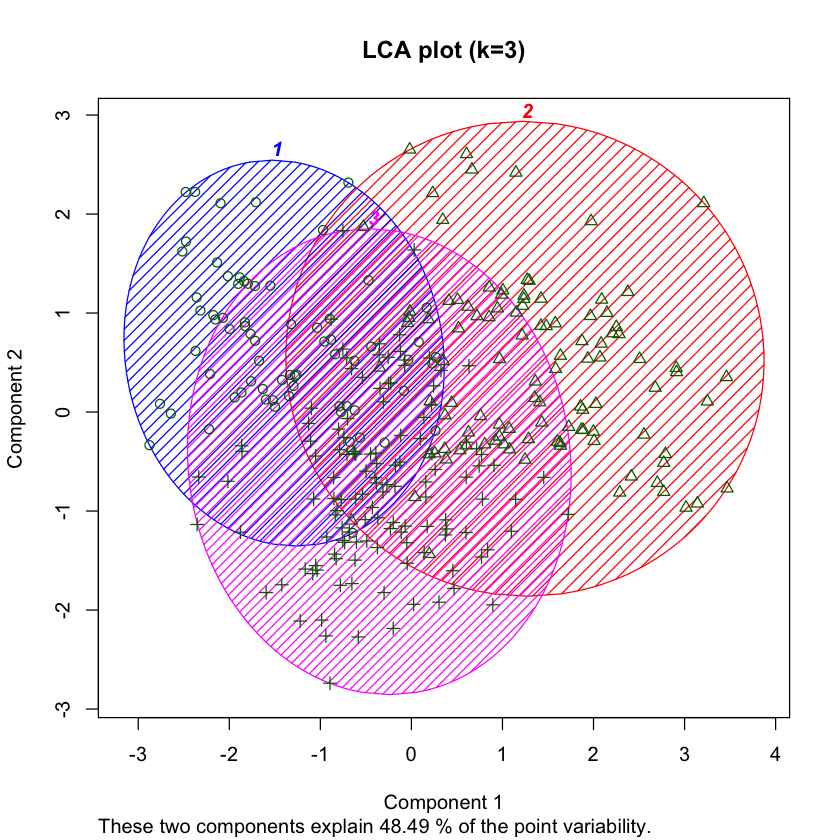

In [33]:
seg.summ(seg.df, seg.LCA3$predclass)
table(seg.LCA3$predclass)
clusplot(seg.df, seg.LCA3$predclass, color=TRUE, shade=TRUE, labels=4, lines=0, main="LCA plot (k=3)")

Group.1,age,gender,income,kids,ownHome,subscribe
1,36.62554,1.349593,52080.13,2.1951220,1.349593,1.113821
2,53.64073,1.535714,60534.17,0.5178571,1.785714,1.098214
3,30.22575,1.050000,41361.81,0.0000000,1.350000,1.000000
4,27.61506,1.866667,28178.70,1.1777778,1.066667,1.333333



  1   2   3   4 
123 112  20  45 

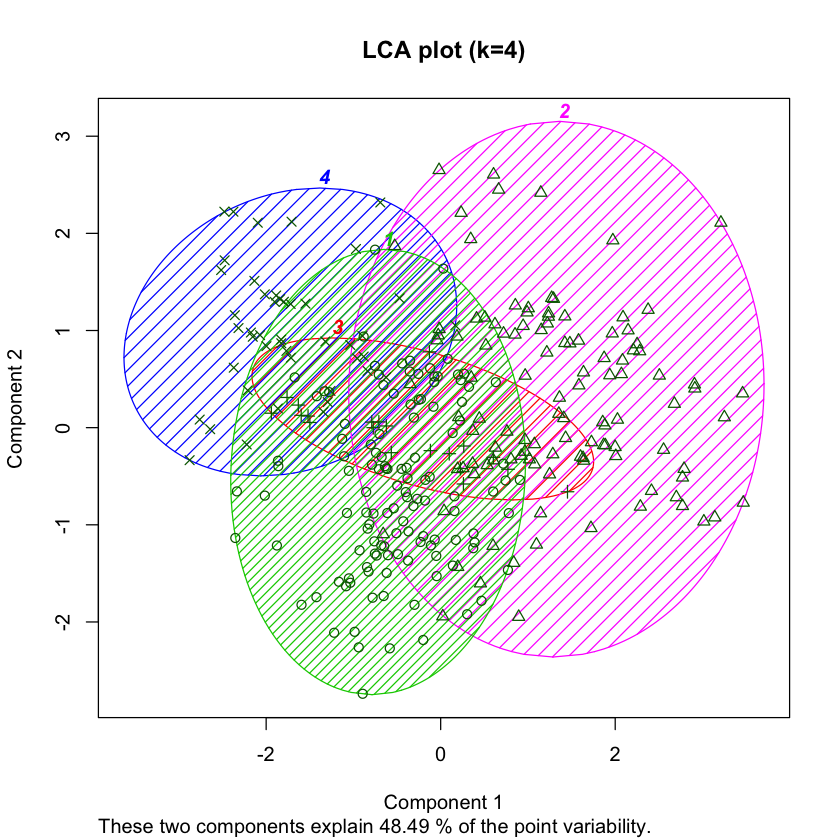

In [34]:
seg.summ(seg.df, seg.LCA4$predclass)
table(seg.LCA4$predclass)
clusplot(seg.df, seg.LCA4$predclass, color=TRUE, shade=TRUE, labels=4, lines=0, main="LCA plot (k=4)")

## 11.3.8 Comparing Cluster Solutions

In [35]:
table(seg.LCA3$predclass, seg.LCA4$predclass)

   
      1   2   3   4
  1  13   0  12  45
  2   0 104   0   0
  3 110   8   8   0

In [36]:
library(mclust)
mapClass(seg.LCA3$predclass, seg.LCA4$predclass)

$aTOb
$aTOb$`1`
[1] 4

$aTOb$`2`
[1] 2

$aTOb$`3`
[1] 1


$bTOa
$bTOa$`1`
[1] 3

$bTOa$`2`
[1] 2

$bTOa$`3`
[1] 1

$bTOa$`4`
[1] 1

In [37]:
adjustedRandIndex(seg.LCA3$predclass, seg.LCA4$predclass)

[1] 0.7288822

In [42]:
set.seed(11021)
random.data <- sample(4, length(seg.LCA4$predclass), replace=TRUE)
adjustedRandIndex(random.data, seg.LCA4$predclass)

[1] 0.002292031

In [43]:
table(seg.raw$Segment, seg.LCA4$predclass)
adjustedRandIndex(seg.raw$Segment, seg.LCA4$predclass)

            
              1  2  3  4
  Moving Up  50  4  8  8
  Suburb mix 62 29  2  7
  Travelers   0 79  1  0
  Urban hip  11  0  9 30

[1] 0.3513031

# 11.4 Classification

In [44]:
set.seed(04625)
train.prop <- 0.65
train.cases <- sample(nrow(seg.raw), nrow(seg.raw)*train.prop)
seg.df.train <- seg.raw[train.cases, ]
seg.df.test <- seg.raw[-train.cases, ]

In [45]:
library(e1071)
(seg.nb <- naiveBayes(Segment ~ ., data=seg.df.train))


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
 Moving Up Suburb mix  Travelers  Urban hip 
 0.2512821  0.3025641  0.2615385  0.1846154 

Conditional probabilities:
            age
Y                [,1]     [,2]
  Moving Up  36.09168 4.167010
  Suburb mix 40.14240 5.173803
  Travelers  57.47194 8.126370
  Urban hip  23.95040 1.798332

            gender
Y               Female      Male
  Moving Up  0.6530612 0.3469388
  Suburb mix 0.4576271 0.5423729
  Travelers  0.4705882 0.5294118
  Urban hip  0.3333333 0.6666667

            income
Y                [,1]      [,2]
  Moving Up  52880.45  9836.682
  Suburb mix 54124.75 11429.940
  Travelers  63547.20 23862.123
  Urban hip  21285.99  5141.259

            kids
Y                [,1]     [,2]
  Moving Up  2.102041 1.489476
  Suburb mix 1.694915 1.249196
  Travelers  0.000000 0.000000
  Urban hip  1.166667 1.108409

            ownHome
Y                o

In [46]:
(seg.nb.class <-predict(seg.nb, seg.df.test))

[1] Suburb mix Travelers  Suburb mix Suburb mix Suburb mix Suburb mix
  [7] Moving Up  Suburb mix Suburb mix Suburb mix Travelers  Moving Up 
 [13] Moving Up  Moving Up  Suburb mix Moving Up  Moving Up  Suburb mix
 [19] Suburb mix Suburb mix Moving Up  Suburb mix Suburb mix Moving Up 
 [25] Suburb mix Suburb mix Moving Up  Suburb mix Suburb mix Suburb mix
 [31] Suburb mix Suburb mix Suburb mix Moving Up  Suburb mix Suburb mix
 [37] Suburb mix Suburb mix Suburb mix Suburb mix Suburb mix Urban hip 
 [43] Urban hip  Urban hip  Urban hip  Urban hip  Urban hip  Urban hip 
 [49] Urban hip  Urban hip  Urban hip  Moving Up  Urban hip  Urban hip 
 [55] Urban hip  Travelers  Travelers  Travelers  Travelers  Travelers 
 [61] Travelers  Travelers  Travelers  Travelers  Travelers  Travelers 
 [67] Travelers  Travelers  Travelers  Travelers  Travelers  Travelers 
 [73] Travelers  Travelers  Travelers  Travelers  Travelers  Travelers 
 [79] Travelers  Travelers  Travelers  Travelers  Travelers  Travelers 
 [85] Suburb mix Moving Up  Moving Up  Travelers  Moving Up  Travelers 
 [91] Suburb mix Moving Up  Suburb mix Travelers  Moving Up  Travelers 
 [97] Moving Up  Moving Up  Moving Up  Moving Up  Moving Up  Moving Up 
[103] Moving Up  Travelers  Moving Up 
Levels: Moving Up Suburb mix Travelers Urban hip

In [47]:
prop.table(table(seg.nb.class))

seg.nb.class
 Moving Up Suburb mix  Travelers  Urban hip 
 0.2285714  0.3047619  0.3428571  0.1238095 

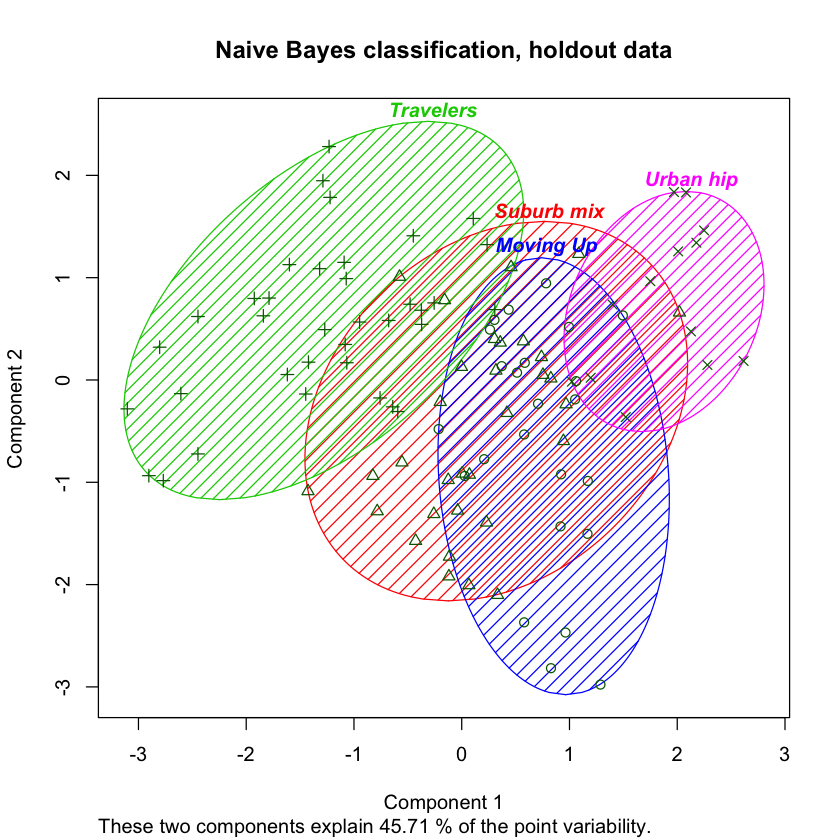

In [49]:
clusplot(seg.df.test[, -7], seg.nb.class, color=TRUE, shade=TRUE, labels=4, lines=0, 
         main="Naive Bayes classification, holdout data")

In [50]:
mean(seg.df.test$Segment==seg.nb.class)

[1] 0.8

In [51]:
library(mclust)
adjustedRandIndex(seg.nb.class, seg.df.test$Segment)

[1] 0.5626787

In [52]:
table(seg.nb.class, seg.df.test$Segment)

            
seg.nb.class Moving Up Suburb mix Travelers Urban hip
  Moving Up         13         10         0         1
  Suburb mix         3         29         0         0
  Travelers          5          2        29         0
  Urban hip          0          0         0        13

In [54]:
# summary data for proposed segments in the test data
seg.summ(seg.df.test, seg.nb.class)

Group.1,age,gender,income,kids,ownHome,subscribe,Segment
Moving Up,34.29258,1.125000,51369.52,2.2916667,1.416667,1.250000,1.541667
Suburb mix,41.24653,1.562500,58095.10,2.1875000,1.562500,1.000000,1.906250
Travelers,55.08669,1.444444,58634.10,0.0000000,1.666667,1.166667,2.666667
Urban hip,23.36047,1.461538,22039.69,0.8461538,1.307692,1.153846,4.000000


In [55]:
seg.summ(seg.df.test, seg.df.test$Segment)

Group.1,age,gender,income,kids,ownHome,subscribe,Segment
Moving Up,36.88989,1.190476,53582.16,1.4761905,1.333333,1.190476,1
Suburb mix,39.61984,1.487805,56341.99,2.2439024,1.585366,1.048780,2
Travelers,58.57245,1.448276,59869.24,0.0000000,1.689655,1.206897,3
Urban hip,23.71537,1.428571,22700.06,0.9285714,1.357143,1.142857,4


In [56]:
predict(seg.nb, seg.df.test, type="raw")

Moving Up,Suburb mix,Travelers,Urban hip
0.4070779794,0.592805214,4.848358e-05,6.832328e-05
0.0002715183,0.002422066,9.973064e-01,6.143554e-32
0.2671392917,0.732689657,1.710510e-04,2.844967e-40
0.2237216425,0.774645744,1.632613e-03,7.568258e-37
0.2255662711,0.774027968,4.057610e-04,9.030641e-11
0.2051010831,0.794804695,9.422156e-05,1.554167e-33
0.6226982604,0.377293787,7.952188e-06,1.250892e-24
0.1429047975,0.856520036,5.751660e-04,2.667936e-36
0.2282427082,0.771646162,1.111296e-04,6.476270e-22
0.1881605806,0.811463209,3.762108e-04,2.155829e-33


## 11.4.2 Random Forest Classification: randomForest()

In [65]:
library(randomForest)
set.seed(98040)
(seg.rf <- randomForest(Segment ~ ., data=seg.df.train, ntree=3000))


Call:
 randomForest(formula = Segment ~ ., data = seg.df.train, ntree = 3000) 
               Type of random forest: classification
                     Number of trees: 3000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 24.1%
Confusion matrix:
           Moving Up Suburb mix Travelers Urban hip class.error
Moving Up         29         19         0         1  0.40816327
Suburb mix        20         35         3         1  0.40677966
Travelers          0          3        48         0  0.05882353
Urban hip          0          0         0        36  0.00000000

In [66]:
seg.rf.class <- predict(seg.rf, seg.df.test)

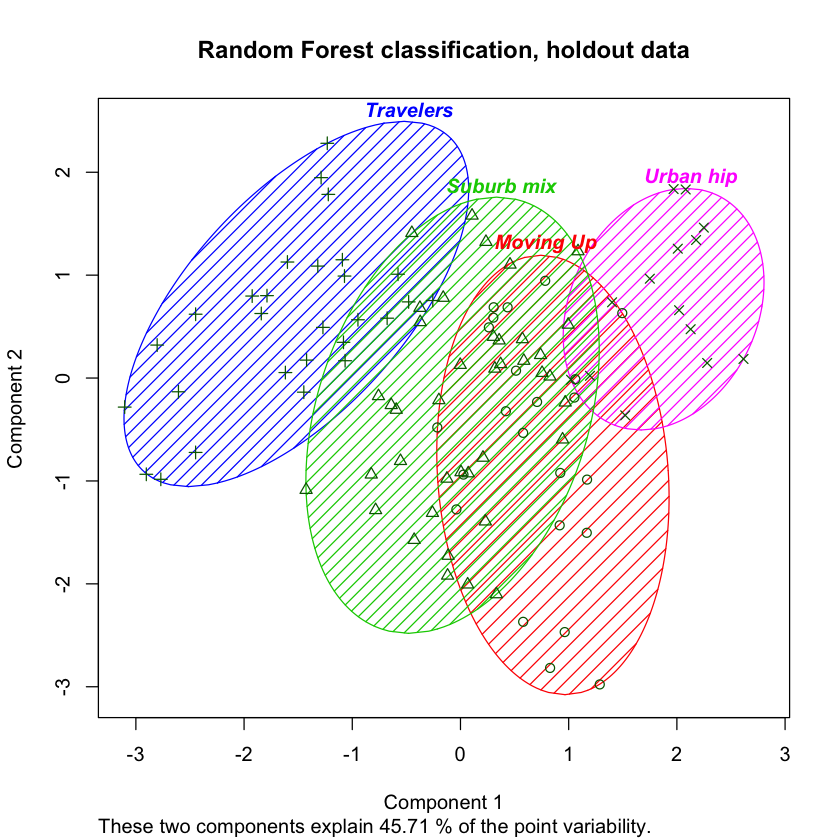

In [68]:
library(cluster)
clusplot(seg.df.test[, -7], seg.rf.class, color=TRUE, shade=TRUE, labels=4, lines=0, 
         main="Random Forest classification, holdout data")

In [67]:
seg.rf.class.all <- predict(seg.rf, seg.df.test, predict.all=TRUE)
apply(seg.rf.class.all$individual[1:5, ], 1, table) / 3000

,2,3,4,6,7
Moving Up,0.42066667,0.076333333,0.1886667,0.1223333,0.217
Suburb mix,0.47266667,0.485000000,0.6930000,0.8526667,0.340
Travelers,0.02966667,0.436333333,0.1173333,0.0240000,0.050
Urban hip,0.07700000,0.002333333,0.0010000,0.0010000,0.393


In [72]:
seg.summ(seg.df.test, seg.rf.class) # proposed segments

Group.1,age,gender,income,kids,ownHome,subscribe,Segment
Moving Up,34.60317,1.130435,52288.38,2.39130435,1.434783,1.260870,1.608696
Suburb mix,40.83221,1.500000,57652.19,1.65000000,1.550000,1.000000,1.850000
Travelers,59.26118,1.464286,59812.04,0.03571429,1.714286,1.214286,2.892857
Urban hip,24.37450,1.500000,21842.73,1.00000000,1.285714,1.142857,3.857143


In [73]:
seg.summ(seg.df.test, seg.df.test$Segment) # actual segments

Group.1,age,gender,income,kids,ownHome,subscribe,Segment
Moving Up,36.88989,1.190476,53582.16,1.4761905,1.333333,1.190476,1
Suburb mix,39.61984,1.487805,56341.99,2.2439024,1.585366,1.048780,2
Travelers,58.57245,1.448276,59869.24,0.0000000,1.689655,1.206897,3
Urban hip,23.71537,1.428571,22700.06,0.9285714,1.357143,1.142857,4


In [74]:
mean(seg.df.test$Segment==seg.rf.class)

[1] 0.7428571

In [75]:
table(seg.df.test$Segment, seg.rf.class)

            seg.rf.class
             Moving Up Suburb mix Travelers Urban hip
  Moving Up         11          9         1         0
  Suburb mix        11         28         1         1
  Travelers          0          3        26         0
  Urban hip          1          0         0        13

In [76]:
library(mclust)
adjustedRandIndex(seg.df.test$Segment, seg.rf.class)

[1] 0.4659346

## 11.4.3 Random Forest Variable Importance

In [77]:
set.seed(98040)
(seg.rf <- randomForest(Segment ~ ., data=seg.df.train, ntree=3000, importance=TRUE))
importance(seg.rf)


Call:
 randomForest(formula = Segment ~ ., data = seg.df.train, ntree = 3000,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 3000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 23.59%
Confusion matrix:
           Moving Up Suburb mix Travelers Urban hip class.error
Moving Up         29         19         0         1  0.40816327
Suburb mix        19         36         3         1  0.38983051
Travelers          0          3        48         0  0.05882353
Urban hip          0          0         0        36  0.00000000

,Moving Up,Suburb mix,Travelers,Urban hip,MeanDecreaseAccuracy,MeanDecreaseGini
age,61.386693,44.653251,121.9187436,86.345025,130.712724,62.399834
gender,13.065763,-4.266584,-1.6609796,8.409029,7.382935,3.354667
income,23.712016,17.428848,15.9978527,77.258853,68.809768,36.439804
kids,18.476067,14.248174,53.8039237,6.308172,52.404913,20.081438
ownHome,5.212246,-11.539183,23.5491524,20.667305,16.063356,4.898022
subscribe,16.625874,9.118376,0.8989833,-3.194460,16.023871,2.965571


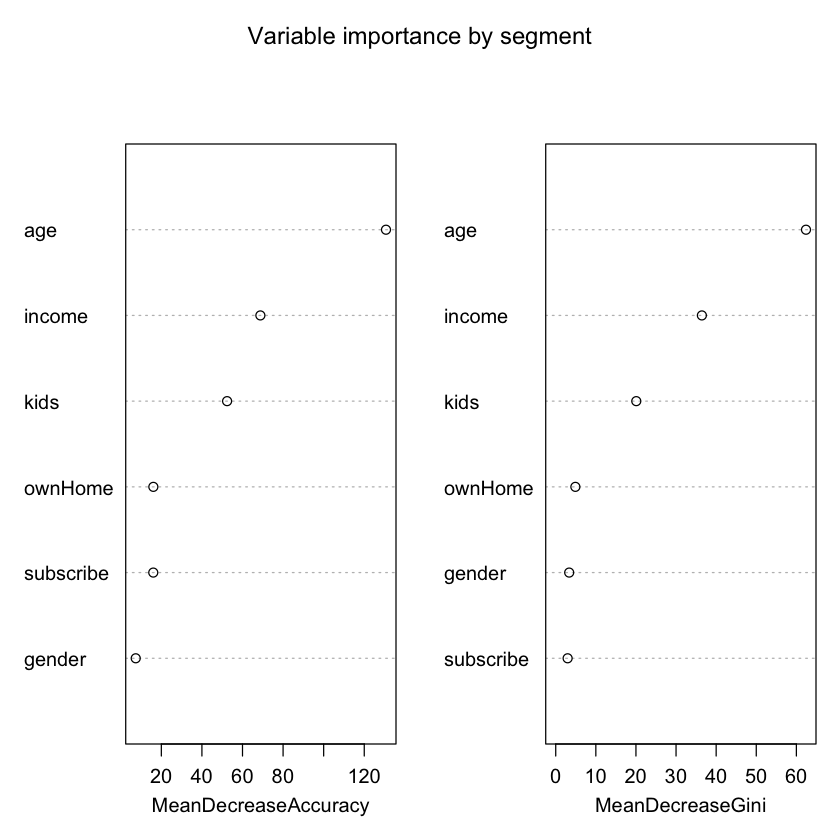

In [78]:
varImpPlot(seg.rf, main="Variable importance by segment")


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



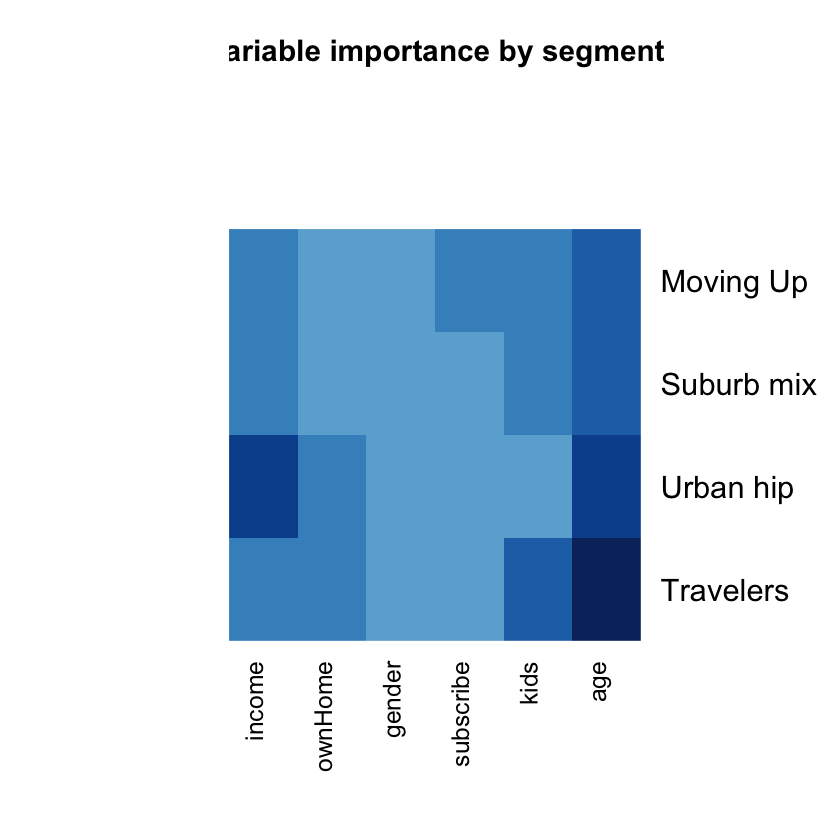

In [79]:
library(gplots)
library(RColorBrewer)
heatmap.2(t(importance(seg.rf)[, 1:4]),
         col=brewer.pal(9, "Blues"),
         dend="none", trace="none", key=FALSE,
         margins=c(10,10),
         main="Variable importance by segment")

# 11.5 Prediction: Identifying Potential Customers

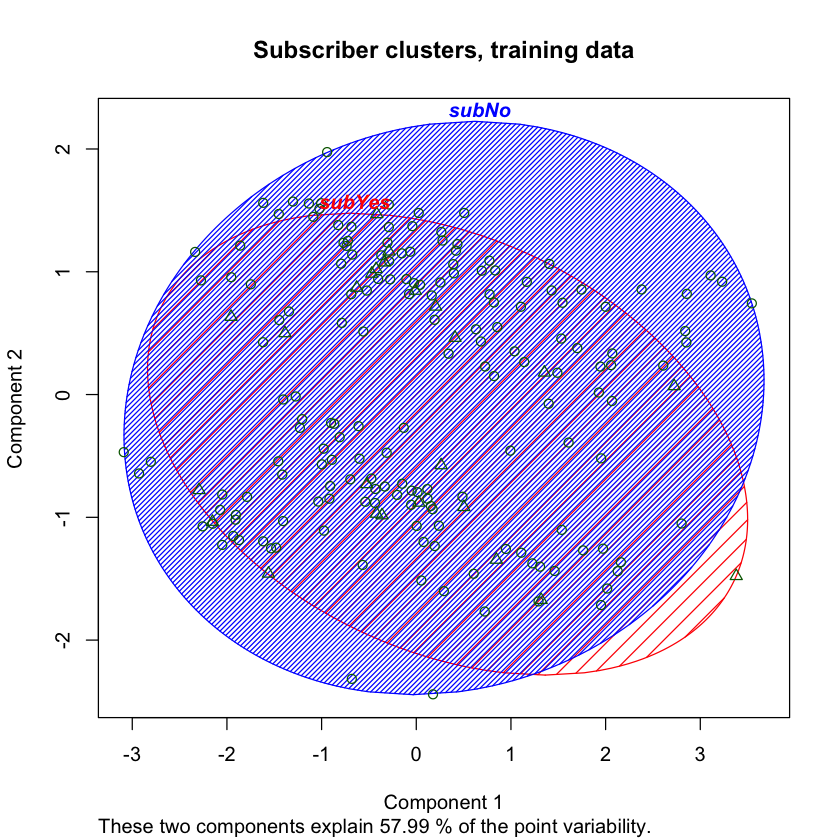

In [80]:
set.seed(92118)
train.prop <- 0.65
train.cases <- sample(nrow(seg.df), nrow(seg.df) * train.prop)
sub.df.train <- seg.df[train.cases, ]
sub.df.test <- seg.df[-train.cases, ]
clusplot(sub.df.train[,-6], sub.df.train$subscribe, color=TRUE, shade=TRUE, labels=4, lines=0,
        main="Subscriber clusters, training data")

In [82]:
library(randomForest)
set.seed(11954)
(sub.rf <- randomForest(subscribe ~ ., data=sub.df.train, ntree = 3000))


Call:
 randomForest(formula = subscribe ~ ., data = sub.df.train, ntree = 3000) 
               Type of random forest: classification
                     Number of trees: 3000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 14.36%
Confusion matrix:
       subNo subYes class.error
subNo    167      3  0.01764706
subYes    25      0  1.00000000

In [83]:
set.seed(11954)
(sub.rf <- randomForest(subscribe ~ ., data=sub.df.train, ntree = 3000, sampsize=c(25,25)))


Call:
 randomForest(formula = subscribe ~ ., data = sub.df.train, ntree = 3000,      sampsize = c(25, 25)) 
               Type of random forest: classification
                     Number of trees: 3000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 34.36%
Confusion matrix:
       subNo subYes class.error
subNo    120     50   0.2941176
subYes    17      8   0.6800000

In [84]:
sub.rf.sub <- predict(sub.rf, sub.df.test)
table(sub.rf.sub, sub.df.test$subscribe)

          
sub.rf.sub subNo subYes
    subNo     72      9
    subYes    18      6

In [85]:
adjustedRandIndex(sub.rf.sub, sub.df.test$subscribe)

[1] 0.09717629

In [86]:
library(psych)
cohen.kappa(cbind(sub.rf.sub, sub.df.test$subscribe))


Attaching package: ‘psych’

The following object is masked from ‘package:randomForest’:

    outlier

The following object is masked from ‘package:mclust’:

    sim

Warning message in any(abs(bounds)):
“ 'double' 型の引数を論理型に変換します ”

Call: cohen.kappa1(x = x, w = w, n.obs = n.obs, alpha = alpha, levels = levels)

Cohen Kappa and Weighted Kappa correlation coefficients and confidence boundaries 
                  lower estimate upper
unweighted kappa -0.051     0.16  0.37
weighted kappa   -0.051     0.16  0.37

 Number of subjects = 105 

# complements about flexclust

Loading required package: grid
Loading required package: lattice
Loading required package: modeltools
Loading required package: stats4


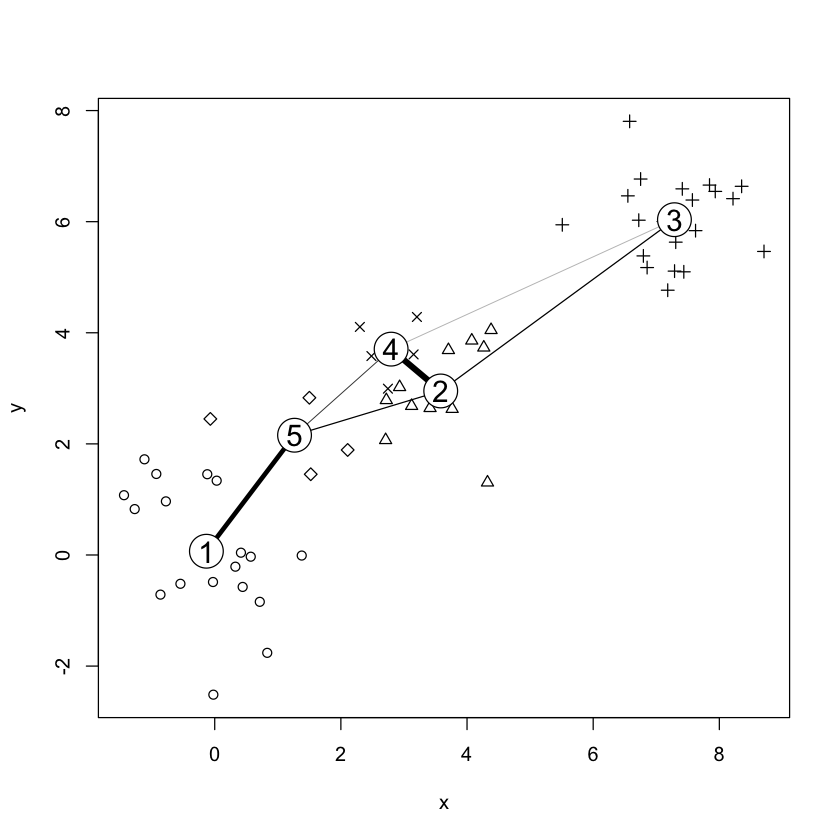

In [1]:
library(flexclust)
library(mvtnorm)
set.seed(290875)
x <- rbind(rmvnorm(n=20, mean=c(0,0), sigma=diag(2)),
          rmvnorm(n=20, mean=c(3,3), sigma=0.5*diag(2)),
          rmvnorm(n=20, mean=c(7,6), sigma=0.5*(diag(2) + 0.25)))
k <-cclust(x, k=5, save.data=TRUE)
plot(k, hull=FALSE, col=rep("black", 5), xlab="x", ylab="y")

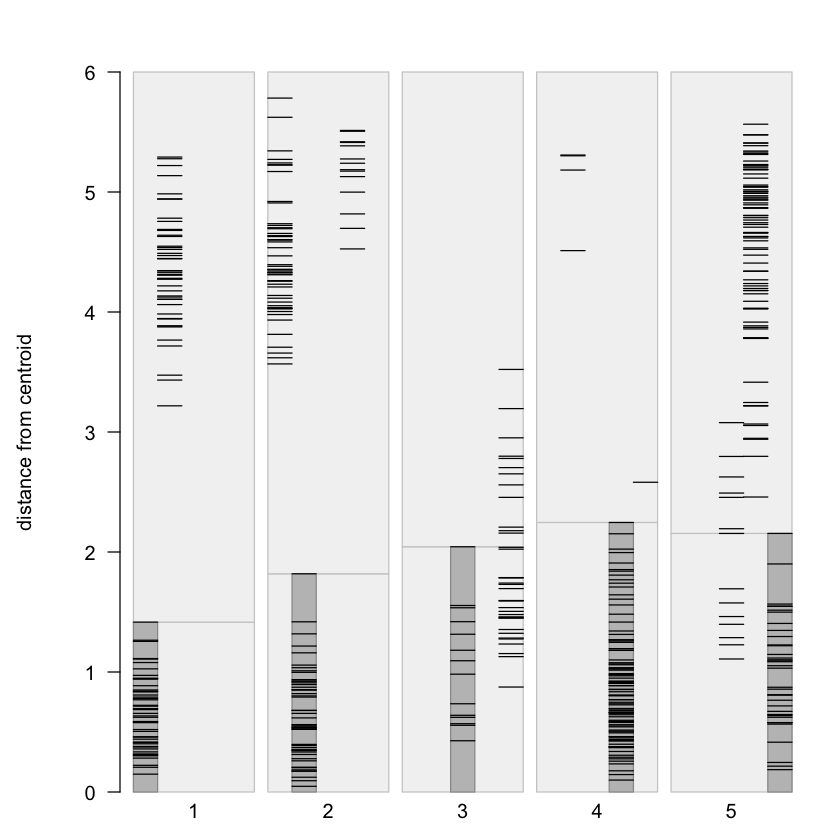

In [2]:
set.seed(912345654)
x <- rbind(matrix(rnorm(100, sd=0.5), ncol=2),
          matrix(rnorm(100, mean=4, sd=0.5), ncol=2),
          matrix(rnorm(100, mean=7, sd=0.5), ncol=2),
          matrix(rnorm(100, mean=-1.0, sd=0.7), ncol=2),
          matrix(rnorm(100, mean=-4.0, sd=1.0), ncol=2))
c5 <- cclust(x, 5, save.data=TRUE)
stripes(c5, type="second", col=1)